In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import mmread

def get_graph(graph_filepath: str):
    G = None
    if graph_filepath.endswith('.mtx'):
        G = nx.read_adjlist(graph_filepath)  
    elif graph_filepath.endswith('.edges'):
        G = nx.read_edgelist(graph_filepath)
    else:
        ValueError("Wrong graph type!")
        
    return G 


def visualize_graph(graph_filepath: str):
    G = get_graph(graph_filepath)

    node_degrees = dict(G.degree())
    
    unique_degrees = list(set(node_degrees.values()))
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_degrees)))
    
    node_colors = [colors[unique_degrees.index(deg)] for deg in node_degrees.values()]
    
    node_sizes = [deg * 2 for deg in node_degrees.values()]
    
    plt.figure(figsize=(12, 12))  
    pos = nx.spring_layout(G, seed=42, k=0.2)  
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.viridis)
    nx.draw_networkx_edges(G, pos, alpha=0.4)  

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                               norm=plt.Normalize(vmin=min(unique_degrees), vmax=max(unique_degrees)))
    sm.set_array([])

    
    plt.title(f'Graph Visualization: {graph_filepath}')
    plt.show()


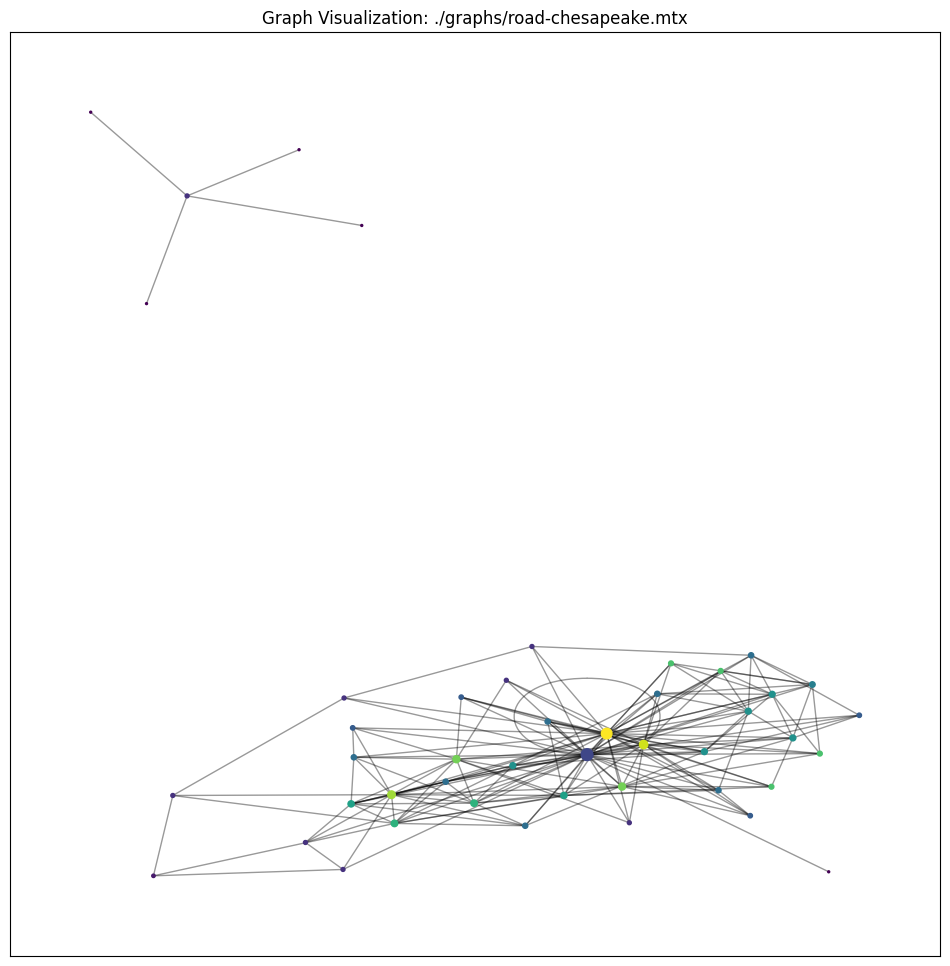

In [23]:
# road
visualize_graph('./graphs/road-chesapeake.mtx')

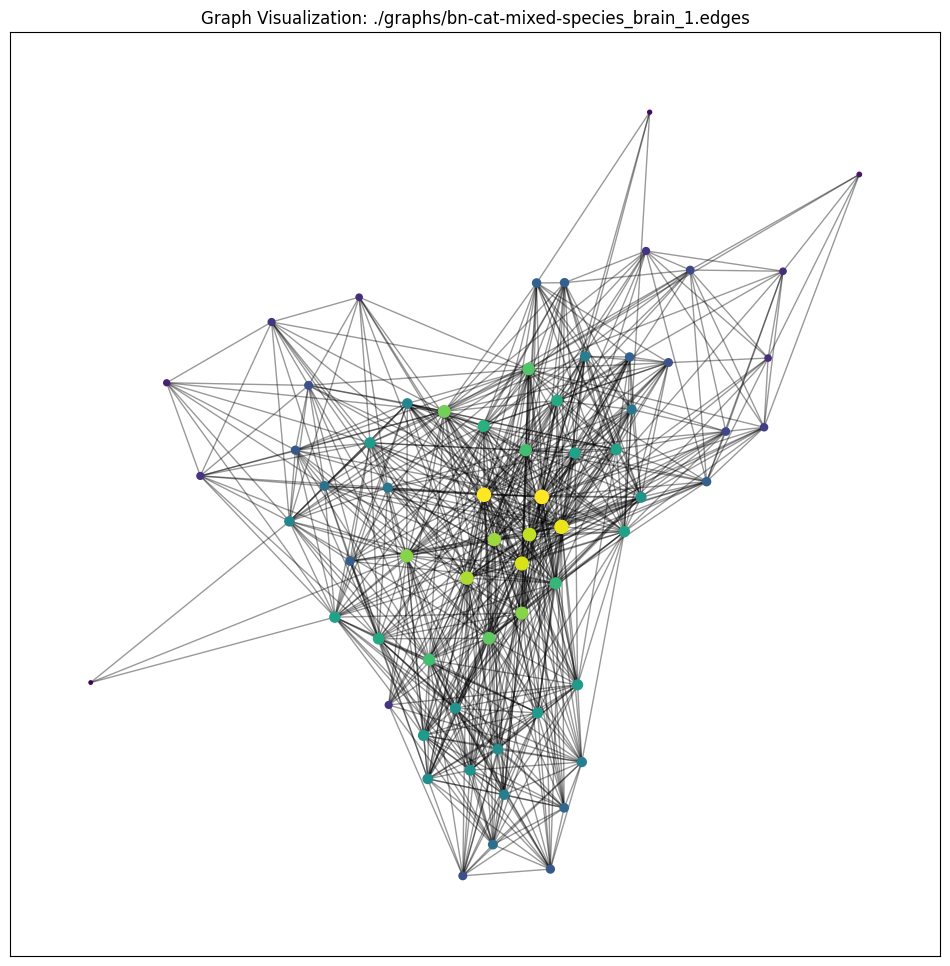

In [24]:
# cat brian
visualize_graph('./graphs/bn-cat-mixed-species_brain_1.edges')

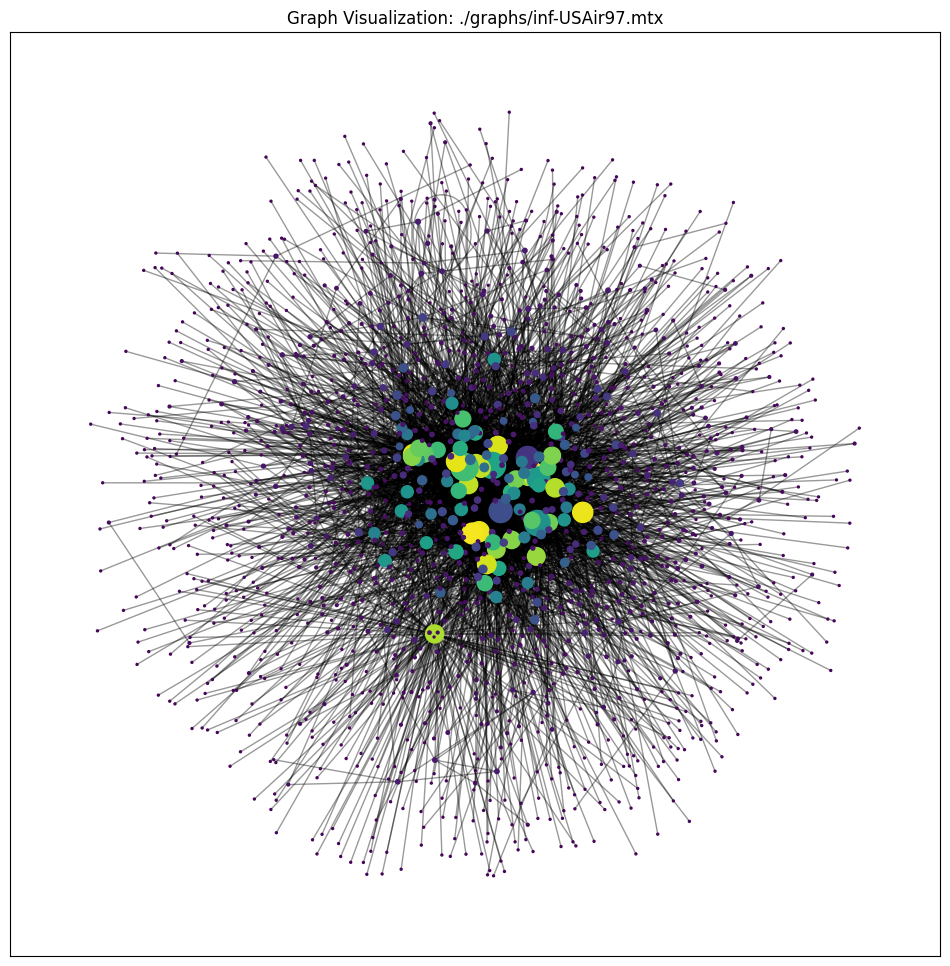

In [25]:
# air (?) infrastuction newtworks
# different k value
visualize_graph('./graphs/inf-USAir97.mtx')

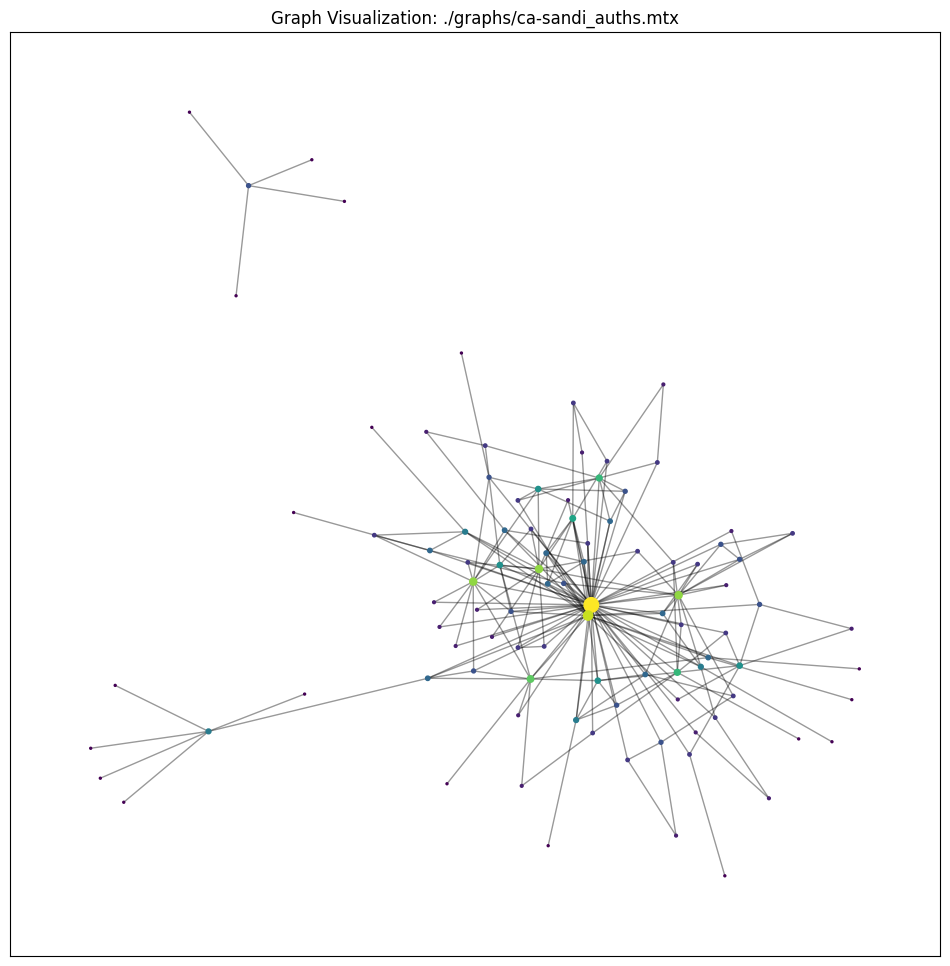

In [26]:
# collaboration networks
visualize_graph('./graphs/ca-sandi_auths.mtx')